# Credit Card Fraud Detection With Various ML Models
Bagging Classifier, KNN Classifier, Random Forest Classifier, Adaboost Classifier and Gradientboot Classifier

## Importing all the necessary libraries

In [45]:
import warnings
warnings.filterwarnings('ignore')

# general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# libraries for models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix

## Loading, Viewing and Describing the Dataset
Describing here means finding the count, max, min, mean, std, 25%, 50% and 75% of the data. Info function gives information on the datatypes of each column, the non-null count for each column and the memory usage.The isna().sum() gives a sum of the number of null values for each column (missing value analysis).

In [57]:
ccdata=pd.read_csv("creditcard.csv")
# remove columns that are irrelevant
ccdata = ccdata.drop(columns=['Time'], axis=1) 

In [58]:
ccdata.shape
ccdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
ccdata.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,7.094921e-13,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [8]:
ccdata.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

## Correlation Analysis

<AxesSubplot:>

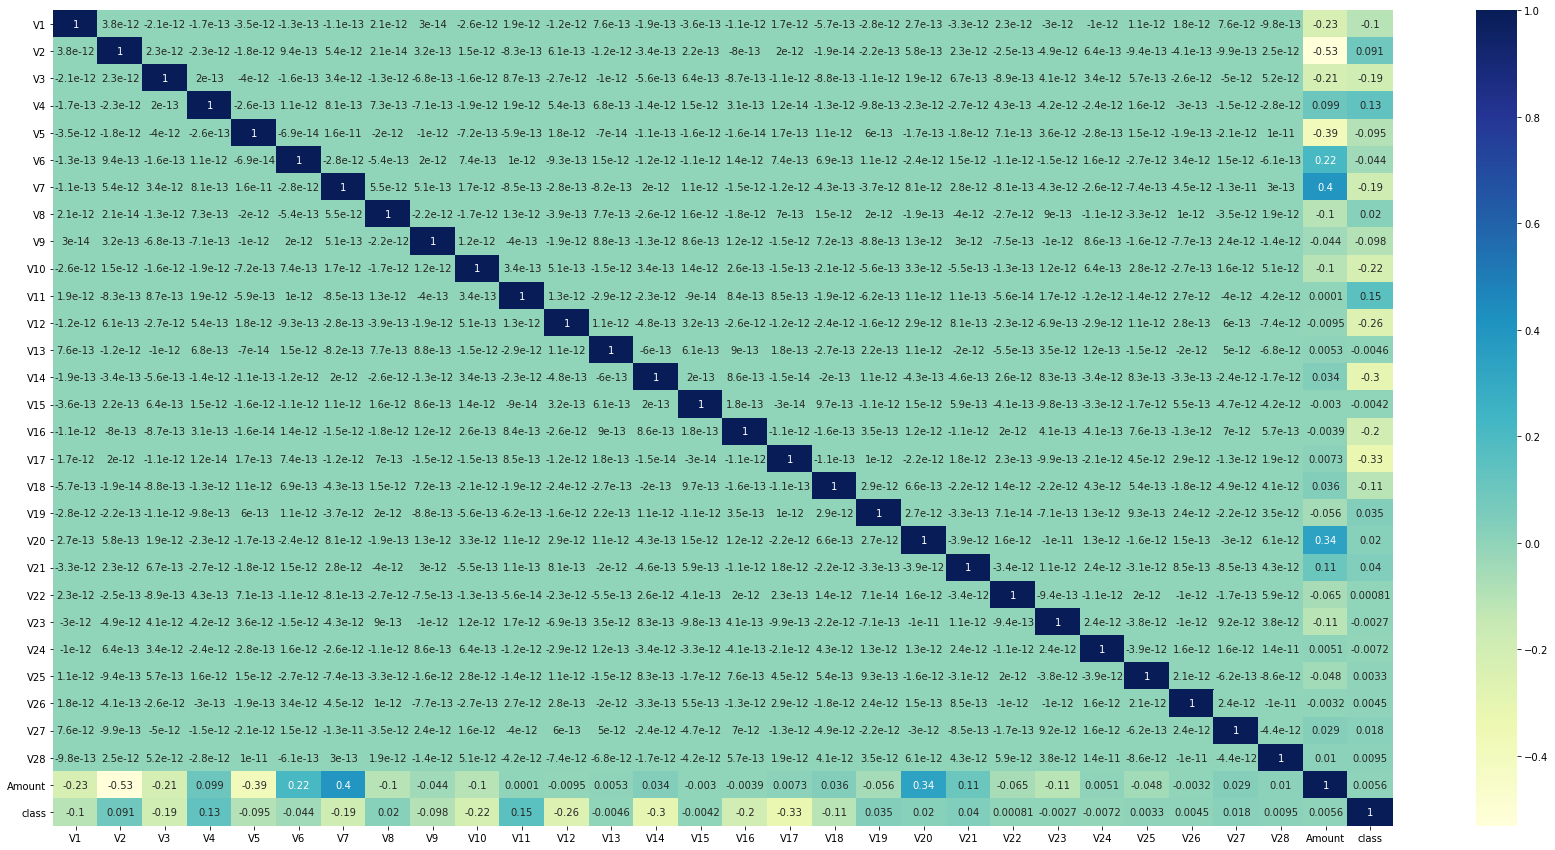

In [9]:
plt.figure(figsize=(30,15))
corr = ccdata.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

All the features have very less significant effect on the "CC Fraud"

## Preprocessing of Data and Pipelining
Pipelining involves autmation of workflow that's followed in producing and training of a machine learning model

### 1. Dividing the dataset into training and test datasets 


In [11]:
x_train=ccdata.drop(columns=["class"])
y_train=ccdata["class"]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

In [12]:
print('Train dataset shape:',x_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (199364, 29)
Test dataset shape (199364,)


### 2. Assigning columns according to datatypes, to variables

In [16]:
numeric_columns = x_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('-'*100)
categorical_columns = x_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index([], dtype='object')


### 3. Setting Up Pipeline

In [34]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('-'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
----------------------------------------------------------------------------------------------------
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                

### 4. Defining function for setting the pipeline in motion for each algorithm

In [35]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(x_train, y_train)
    return model

### 5. Defining a function to produce a confusion matrix for each algorithm and corresponding model

In [36]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    

    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

### 6. Defining a function to prepare a classification report for each algorithm

In [29]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))

In [53]:
algorithms = [('Bagging Classifier', BaggingClassifier()), 
              ('KNN Classifier', KNeighborsClassifier()), 
              ('Random Forest Classifier', RandomForestClassifier()), 
              ('Adaboost Classifier', AdaBoostClassifier()), 
              ('Gradientboot Classifier',GradientBoostingClassifier()),
              ('Decision Tree Classifier', DecisionTreeClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(x_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [54]:
print(model_and_score)

{'Bagging Classifier': '99.97291386609419%', 'KNN Classifier': '99.8746012319175%', 'Random Forest Classifier': '100.0%', 'Adaboost Classifier': '99.84500712265003%', 'Gradientboot Classifier': '99.86607411568788%', 'Decision Tree Classifier': '100.0%'}


## Producing and presenting the confusion matrices for all the models

Bagging Classifier


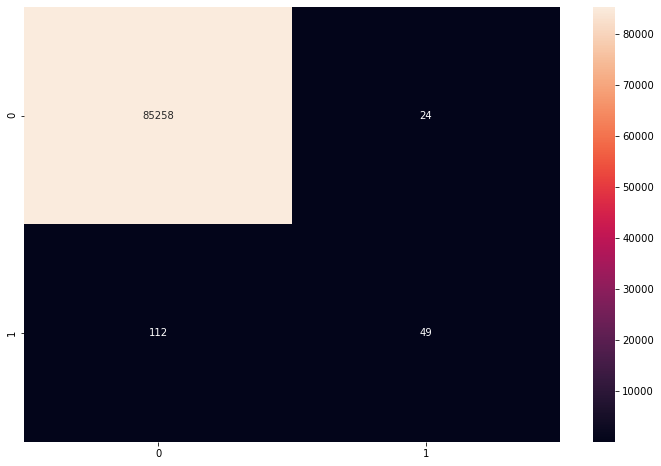

KNN Classifier


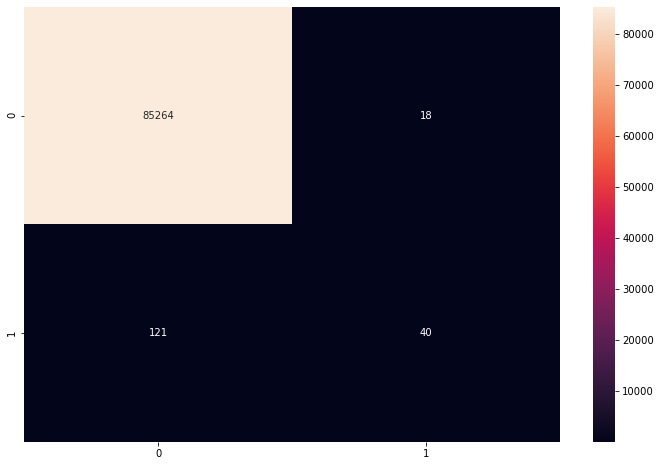

Random Forest Classifier


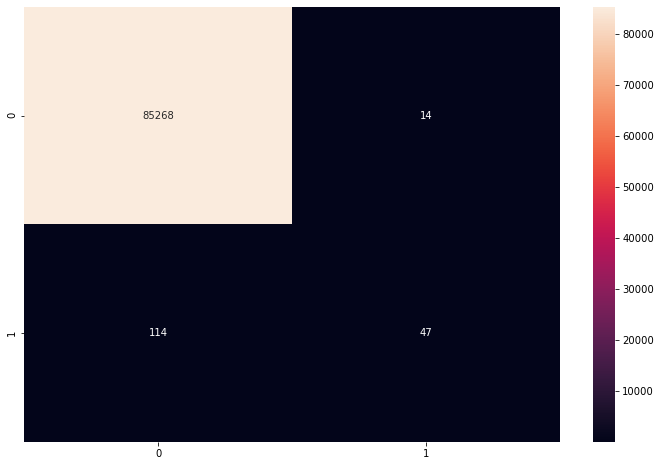

Adaboost Classifier


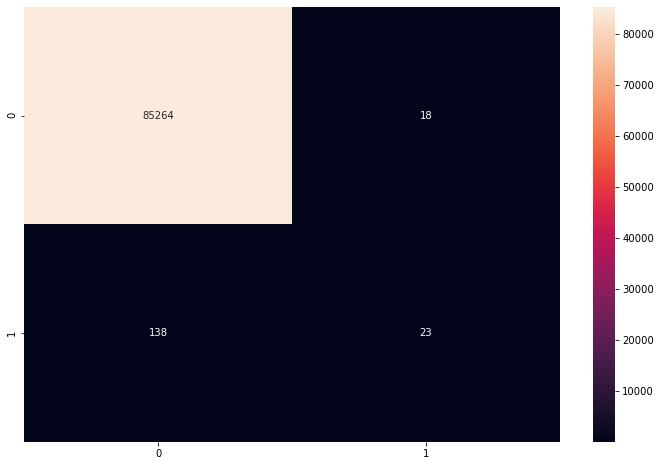

Gradientboot Classifier


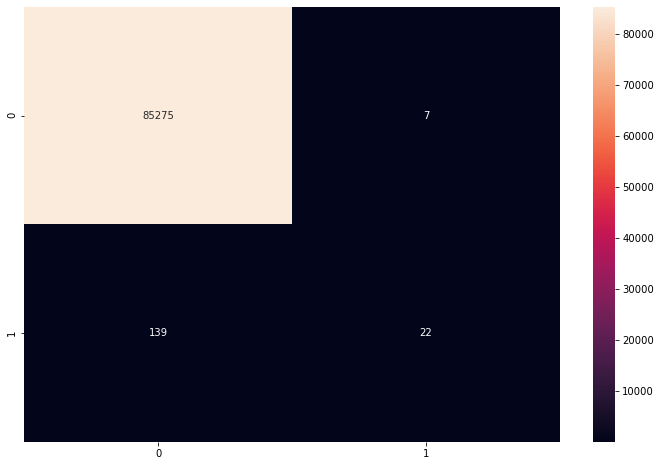

Decision Tree Classifier


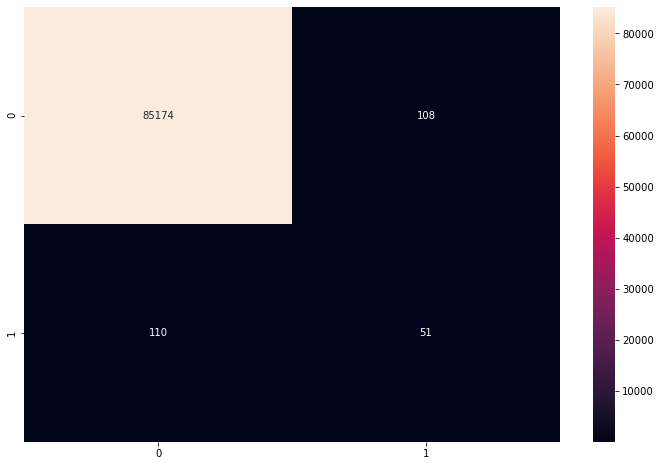

In [55]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

## Producing Classification Report for all models

In [56]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

Bagging Classifier Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85282
           1       0.67      0.30      0.42       161

    accuracy                           1.00     85443
   macro avg       0.83      0.65      0.71     85443
weighted avg       1.00      1.00      1.00     85443



KNN Classifier Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85282
           1       0.69      0.25      0.37       161

    accuracy                           1.00     85443
   macro avg       0.84      0.62      0.68     85443
weighted avg       1.00      1.00      1.00     85443



Random Forest Classifier Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85282
           1       0.77      0.29      0.42       161

    accuracy                           1.00     85443
   macro avg       0.88      0.65     

## Conclusion:
Some of the models show 100% accuracy due to good training and testing data. This can also depend on the algorithm used.